<a href="https://colab.research.google.com/github/mkaran02/energy-efficiency-optimization/blob/main/energyeffopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First few Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First few Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [3]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [4]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



<ipython-input-6-beb54253739e>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Energy Consumption According to Year')

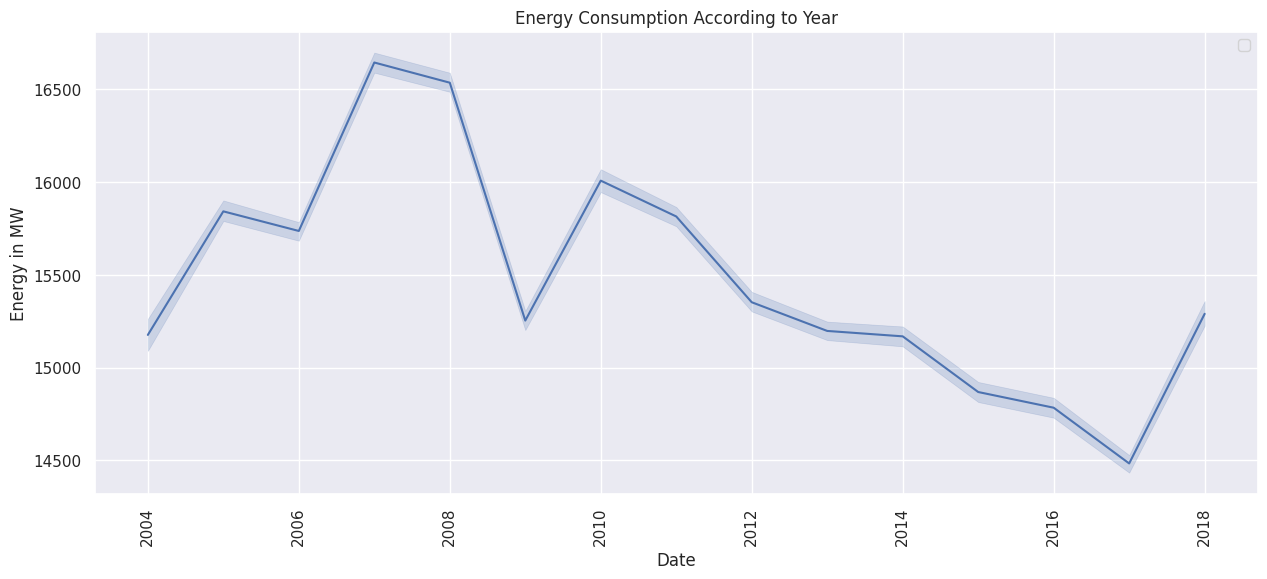

In [6]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")


<ipython-input-8-56c1376e9a2e>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


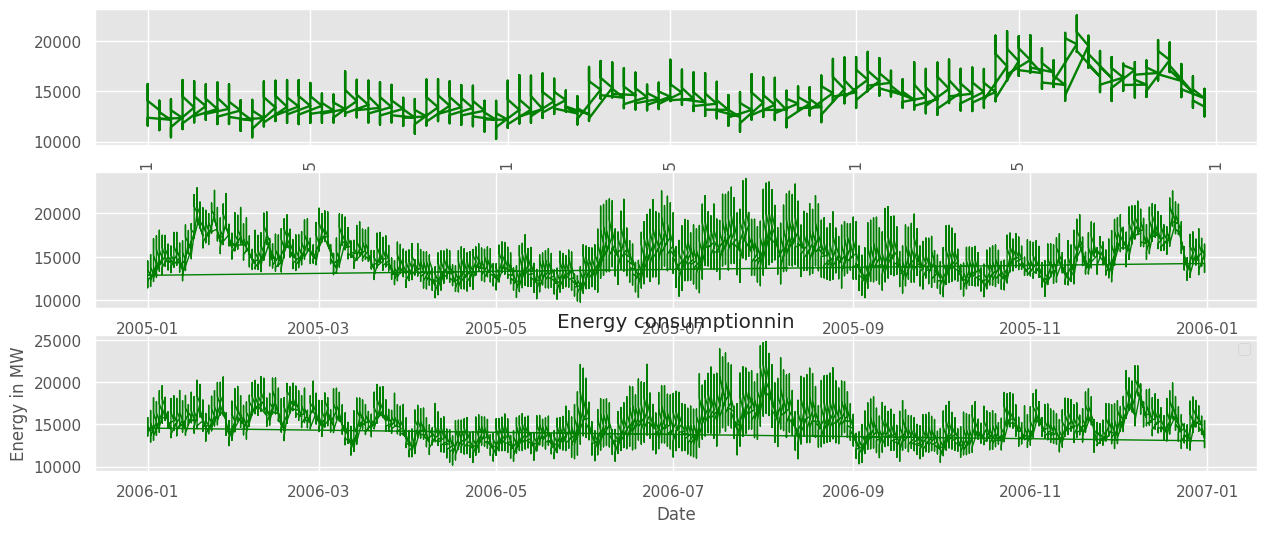

In [8]:
from matplotlib import style


fig = plt.figure()  # Creating a new figure object to hold the plots.

 ax1= fig.add_subplot(311) # Adding the first subplot (ax1) to the
# figure. 311 means 3 rows,
# 1 column, and this is the first subplot.
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')style.use('ggplot') # Applying the 'ggplot' style to the plots for a cleaner aesthetic.

# Filter data for each year
# # (# Extracting energy consumption (AEP_MW) for the year 2004 and
# # converting it to a list. x_2004 = dataset[dataset["Year"] == 2004]["Date"].
# to_list() # Extracting corresponding dates for the year 2004 and converting
# it to a list. ax1.plot(x_2004,y_2004, color="green", linewidth=1.7) # Plotting
# the data for 2004 on the first subplot (ax1) with green color and linewidth 1.7)
y_2004 = dataset[dataset["Year"] == 2004]["AEP_MW"].to_list()
x_2004 = dataset[dataset["Year"] == 2004]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset[dataset["Year"] == 2005]["AEP_MW"].to_list()
x_2005 = dataset[dataset["Year"] == 2005]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset[dataset["Year"] == 2006]["AEP_MW"].to_list()
x_2006 = dataset[dataset["Year"] == 2006]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)

# Setting the figure size to 18 inches wide and 8 inches tall
plt.rcParams["figure.figsize"] = (18,8)
# Setting the title of the entire figure
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

 # Rotating the tick labels by 90 degrees for better readability.
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Energy Distribution')

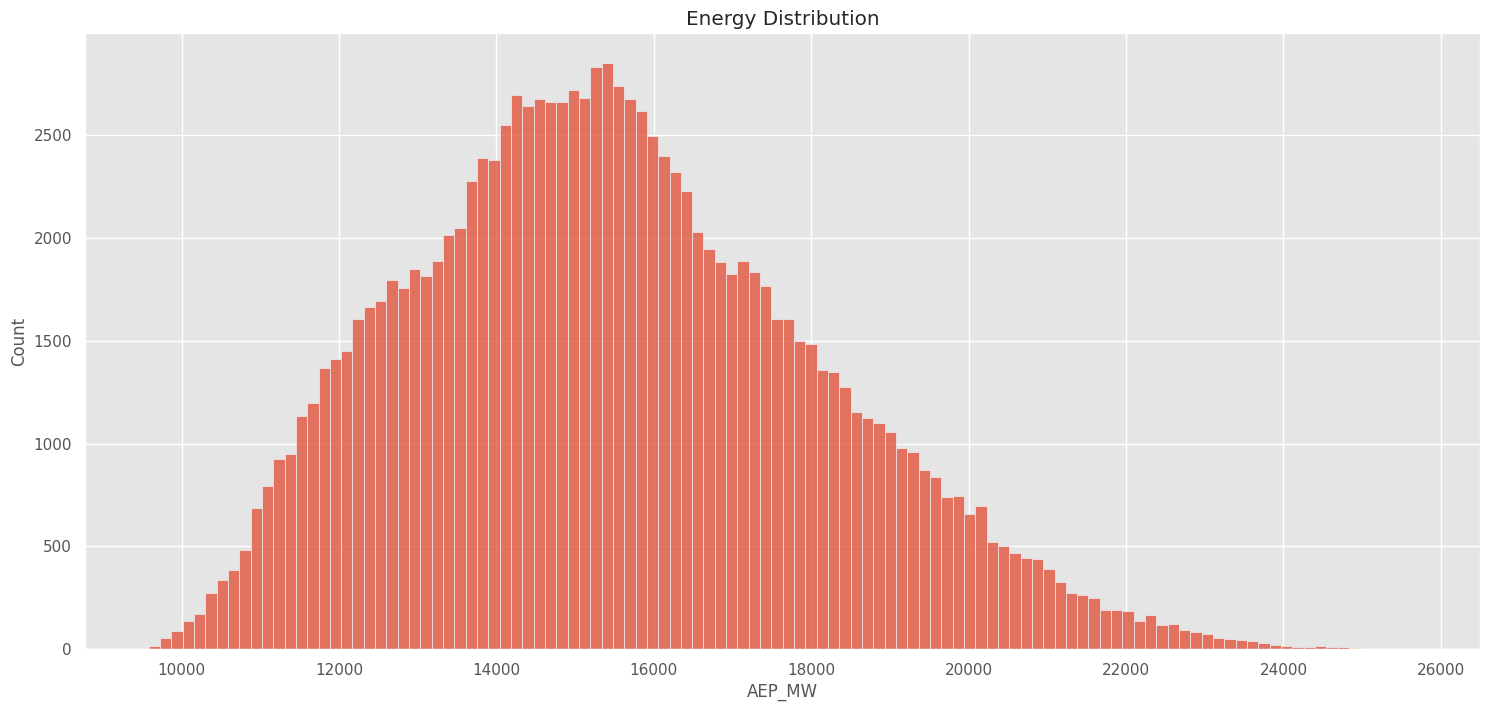

In [13]:
sns.histplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

Energy with Respect to Time

<ipython-input-15-af8557c2e063>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


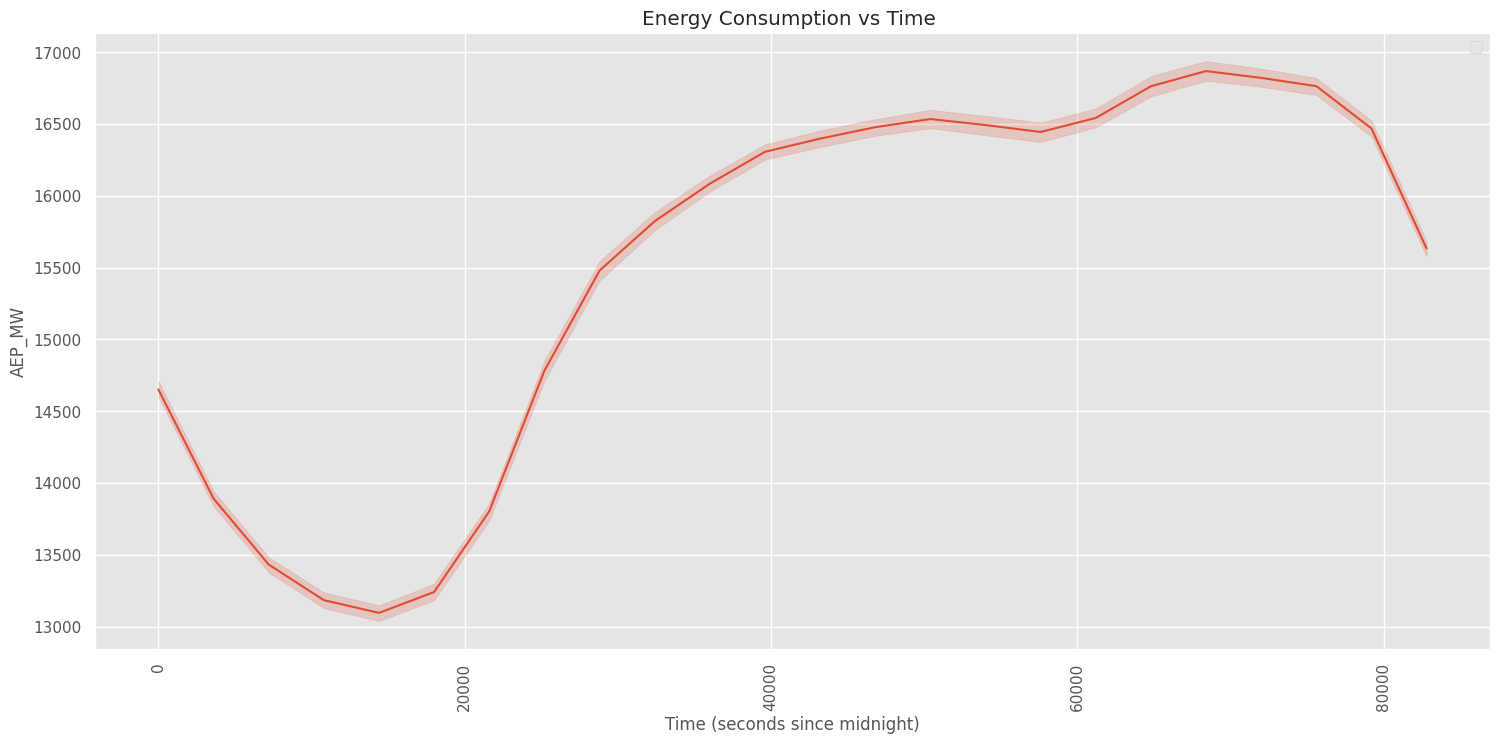

In [15]:
# Energy with Respect to Time
fig = plt.figure()
ax1= fig.add_subplot(111)

# Convert 'Time' column to total seconds since midnight for numerical representation
dataset['Time_numeric'] = dataset['Time'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)

# Now use 'Time_numeric' for the x-axis
sns.lineplot(x=dataset["Time_numeric"], y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time (seconds since midnight)")  # Update x-axis label
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [17]:
# Excluding the 'Date', 'Time', and 'Day' columns from the mean calculation
NewDataSet = dataset.drop(columns=['Date', 'Time', 'Day']).resample('D').mean()

In [18]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 8)
New  Dataset  (5055, 5)


In [19]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [20]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 5)


In [23]:
# Import the MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

# Training_Set is already a NumPy array, so remove this line:
# Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [24]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [25]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [28]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 151ms/step - loss: 0.0367
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - loss: 0.0186
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - loss: 0.0178
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 0.0167
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - loss: 0.0155
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 0.0150
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - loss: 0.0141
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 0.0123
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 0.0113
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 0.0096
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0093
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - loss: 0.0090
Epoch 13/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 0.0081
Epoch 14/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - loss: 0.0079
Epoch 15/50
155

In [30]:
TestData.head(2)

,AEP_MW,Month,Year,Week,Time_numeric
Datetime,,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0,41400.0
2018-04-27,12964.000000,4.0,2018.0,17.0,41400.0


In [31]:
TestData.shape

(100, 5)

In [32]:
NewDataSet.shape


(5055, 5)

In [33]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)


In [34]:
Df_Total.shape


(5155, 1)

In [35]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [36]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step


In [37]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [38]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [39]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13585.041016
1,2018-04-27,12964.000000,12984.058594
2,2018-04-28,12237.583333,14461.428711
3,2018-04-29,12156.791667,13357.250977
4,2018-04-30,13443.500000,12967.266602
...,...,...,...
95,2018-07-30,15368.083333,15133.515625
96,2018-07-31,15180.291667,15538.721680
97,2018-08-01,15151.166667,15172.941406
98,2018-08-02,15687.666667,15006.558594
